# Exploratory Data Analysis

## Introduction
The dataset used in this analysis is the New York City Airbnb Open Data (2019), which provides detailed information about Airbnb listings across the five boroughs of New York City — Manhattan, Brooklyn, Queens, Bronx, and Staten Island. It includes data collected from the Airbnb platform in 2019 and offers insights into various aspects of short-term rental activity in the city.

Each record in the dataset represents a unique Airbnb listing and contains information such as the host’s details, neighborhood, room type, price, number of minimum nights required, availability throughout the year, and the number of reviews.

Analyzing this dataset is valuable because it uncovers trends and patterns in the short-term rental market of one of the world’s most dynamic cities. Through this exploratory data analysis (EDA), we aim to understand how factors like location, pricing, and availability vary across neighborhoods, identify popular areas and property types, and examine how host activity influences the market.

The insights derived from this analysis can be useful for multiple stakeholders:
- Hosts, who can optimize their pricing and improve listing performance based on market trends.
- Travelers, who can make more informed choices regarding affordability and neighborhood preferences.
- Airbnb’s policy and operations teams, who can use the findings to ensure fair usage, monitor saturation levels, and support sustainable tourism practices.


Overall, this analysis aims to provide a data-driven understanding of Airbnb activity across New York City, highlighting both economic and spatial dynamics within the urban short-term rental ecosystem.

## Data Loading & Overview

In [1]:
# Importing necessary libraries.
import pandas as pd

In [2]:
# Loading the dataset.
df = pd.read_csv('../data/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# Shape of the dataset.
print("Dataset Dimensions: ", df.shape)

Dataset Dimensions:  (48895, 16)


In [4]:
# Column names.
print("\nColumn Names:\n", df.columns.tolist())


Column Names:
 ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [5]:
# Info about datatypes, non-null counts, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

----------------

## Data Preprocessing

#### Missing Values:

Identifying missing values

In [6]:
# Missing values per column
print("\nMissing Values: \n", df.isnull().sum())


Missing Values: 
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


Here the missing are:  
1. _name_ - This column describes the listing title. This is not critical for numerical or geographical analysis and only is for presentation. We can safely fill them with some generic value like "Unknown Listing"

In [7]:
df['name'] = df['name'].fillna('Unknown Listing')

2. *host_name* - This is a text identifier, just like the _name_ and is not a factor in pricing or location trends. We can fill it with a generic value "Unknown Host" as well.

In [8]:
df['host_name'] = df['host_name'].fillna('Unknown Host')

3. *last_review* - These missing values are likely the listings that were never reviewed, which is perfectly valid. We are going to convert these into **datetime** type so that we can analyze the trends. And we can replace it "No Reviews" to make the meaning explicit.

In [9]:
df['last_review'] = pd.to_datetime(df['last_review'])
df['last_review'] = df['last_review'].fillna('No Review')

4. *reviews_per_month* - This directly correlates with *last_review*. If there is no *last_value*, this value being _NaN_ makes sense. We will replace these values with "0" to indicate **"no reviews"**.

In [10]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

--------------------------------------------------------------

#### Duplicate Values:  



In [11]:
# Total Duplicate rows
print("\nNumber of Duplicate rows: \n", df.duplicated().sum())


Number of Duplicate rows: 
 0


As there we no duplicate values, we are not going to bother with them.

-------------------

#### Data Type Correction

We are going to convert the Data types of some columns that are stored as _"object"_ datatype. This is to make sure that pandas(and other libraries) that these columns represent distinct groups and not just some _"free-form text"_.

The columns are:
- neighbourhood_group
- room_type
- neighbourhood

We will convert these columns to **"category"** datatype as it is much smarter. The object type stores each string (e.g., "Brooklyn") as a separate Python object in memory.  
If there are 20,000 "Brooklyn" entries, then 20,000 seperate strings are being stored in _"object"_ type.  
The _"category"_ type will store a single list of the unique values (e.g., ["Brooklyn", "Manhattan", "Queens", ...]) and then uses simple integer codes to point to which value each row belongs to.

In [12]:
# Converting neighbourhood_group to category
df['neighbourhood_group'] = df['neighbourhood_group'].astype('category')

# Converting room_type to category
df['room_type'] = df['room_type'].astype('category')

# Converting neighbourhood to category
df['neighbourhood'] = df['neighbourhood'].astype('category')

-------------------------

#### Handling Categorical Data

Handling categorical data involves two steps:
1. Analysing the characteristics
2. Transforming into numerical format for advanced analysis.

*Categorical Column* are those which represents distinct groups or labels. You can't do meaningful math on them.  

In the Dataset, the key categorial columns are:
- *neighbourhood_group*
- *room_type*
- *neighbourhood*

The columns *name* and *host_name* are text area are usually handled by Natural Language processing.

**Step 1** - Checking the Cardinality  
_Cardinality_ is the number of unique values.

In [13]:
categorical_cols = ['neighbourhood_group', 'room_type', 'neighbourhood']
print(df[categorical_cols].nunique())

neighbourhood_group      5
room_type                3
neighbourhood          221
dtype: int64


This clearly shows that *neighbourhood_group* and *room_type* have **low cardinality**, and *neighbourhood* has **high cardinality**

Now, we would check for the unique values and distributions of each columns:

In [14]:
# For neighbourhood_group column
print(df['neighbourhood_group'].value_counts())

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64


In [15]:
# For room_type column
print(df['room_type'].value_counts())

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64


In [16]:
# For neighbourhood column
print(df['neighbourhood'].value_counts())

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
New Dorp                 1
Richmondtown             1
Rossville                1
Willowbrook              1
Woodrow                  1
Name: count, Length: 221, dtype: int64


**Step 2 -** After checking the cardinality and unique values, we will examine the distributions across these categories. 

First, we will define our libraries and a basic theme for our plots.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up a consistent theme for plots:
sns.set_theme(

     style="whitegrid", 

     palette="pastel",  

     rc={
                 
         "figure.figsize": (8, 6),
                
         # Adding a subtle border:
         "axes.edgecolor": "0.15", 
         "axes.linewidth": 1.25,
        
         "grid.color": "0.85", 
         "grid.linestyle": "--",
         "grid.linewidth": 0.5,
        
         # Improving font readablity: 
         "font.family": "serif", 
         "font.size": 12,
         "axes.labelsize": 14,
         "xtick.labelsize": 10,
         "ytick.labelsize": 10,
        
         # Thickening lines for better visibilty:
         "lines.linewidth": 2.5,
    }
)

First we will plot the low-cardinality columns:

1. neighbourhood_group: We order the bars by count for better readability.

Text(0, 0.5, 'Number of Listings')

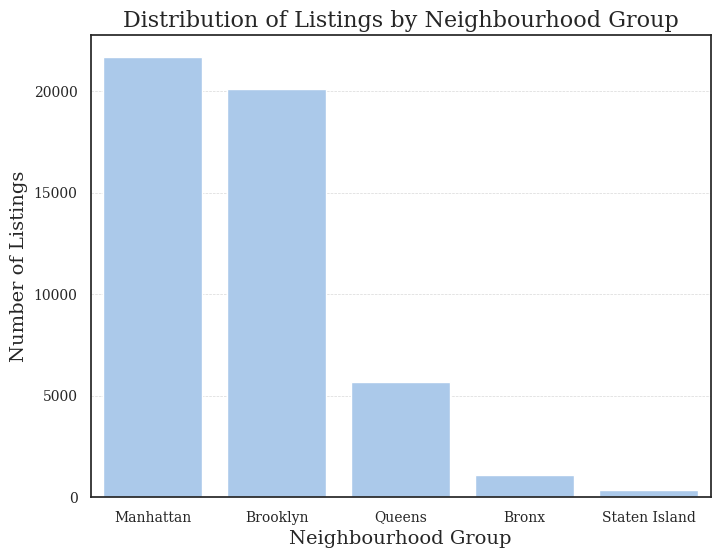

In [18]:
order_nbg = df['neighbourhood_group'].value_counts().index

sns.countplot(data=df, x='neighbourhood_group', order=order_nbg)

plt.title('Distribution of Listings by Neighbourhood Group', fontsize=16)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')

This plot visualizes the supply of listings across the five boroughs of New York City.
Some insights are: 
- The distribution is highly uneven having _Manhattan_ and _Brooklynn_ as epicentres of market, having majority of listings.
- _Queens_ happens to be significant yet secondary market with a potent number of listings.
- _Bronx_ and _Staten Island_ has comparatively very less listings, indicating that they are not the primary market for short-term rentals.


- **Analytical Implication:** This distribution confirms that any meaningful analysis of price, availability, or reviews must treat the boroughs separately, as the market dynamics in Manhattan and Brooklyn are fundamentally different from those in Staten Island.

2. room_type: 

Text(0, 0.5, 'Number of Listings')

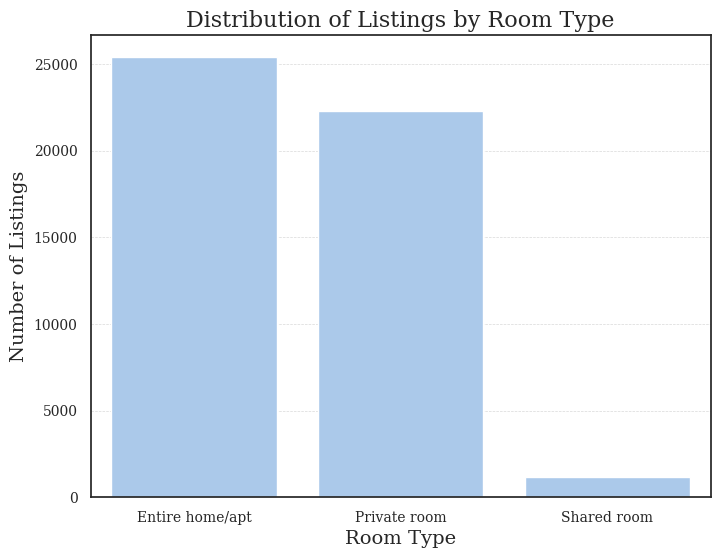

In [19]:
order_rt = df['room_type'].value_counts().index

sns.countplot(data=df, x='room_type', order=order_rt)

plt.title('Distribution of Listings by Room Type', fontsize=16)
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')

This plot breaks down the type of space is offered. Some Insights are:
- Here the market is evenly divided between two types: "_Entire home/apt_" and "_Private Room_". This mean that majorly, the hosts and guests likely seeks for these options.
- "_Shared room_" takes up a niche part of the market. This suggests that there is a very less market for shared accomodations and huge market for private accomodation.


- **Analytical Implication:** The choice between an "_Entire home/apt_" and "_Private room_" is a primary feature of a listing. We should expect price to be a key differentiator between these two categories.

Next, we will plot the high cardinality columns:

- neighbourhood: For high cardinality, we plot the Top 20 most frequent.
(_Note_ - In this part, we have to add a few more methods as we have previously made the neighbourhood as "_category_" DataType and the category type remembers all 221 unique values, even when we filter the data.)

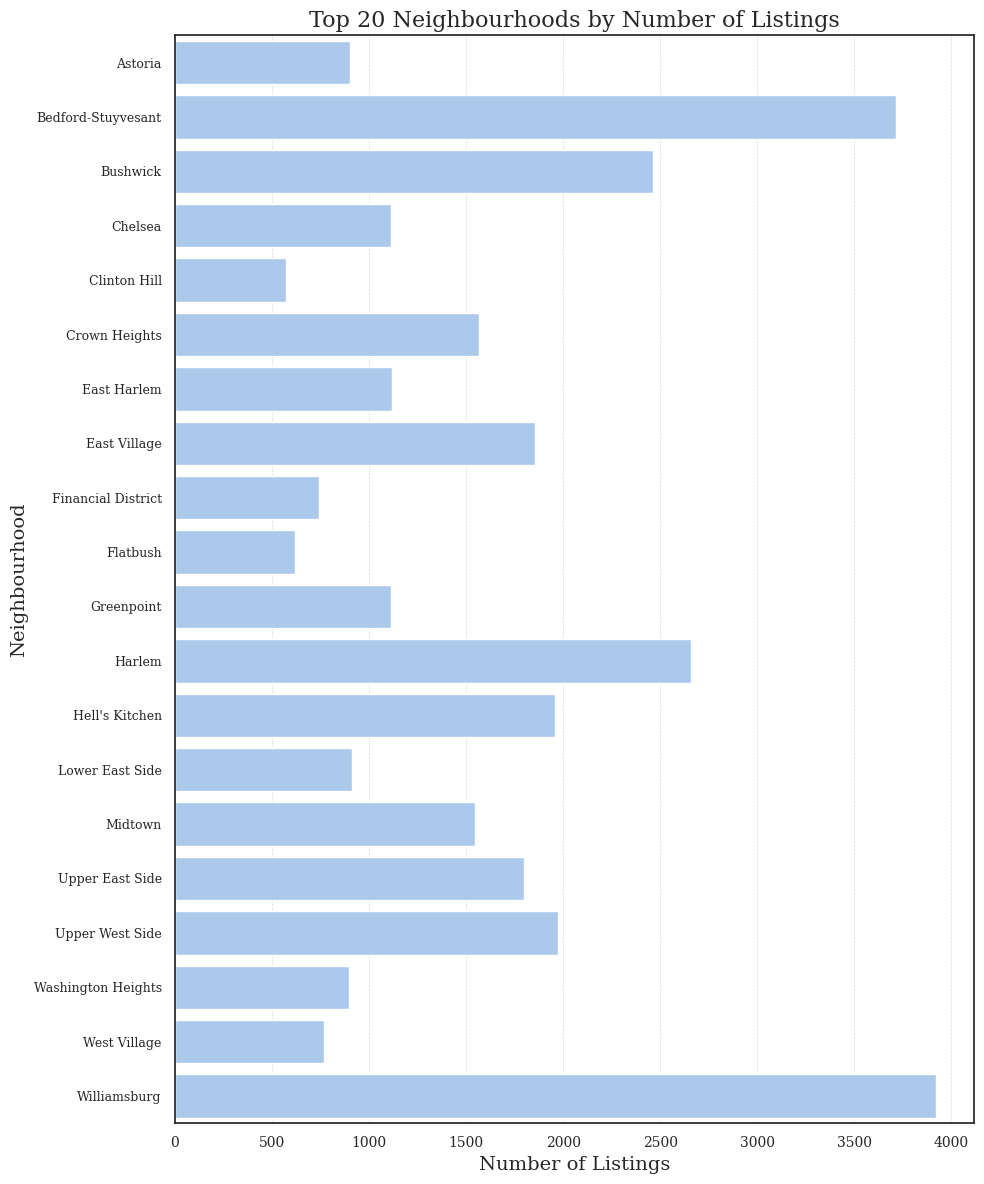

In [20]:
# Getting the Top 20 data as a Series
top_20_data = df['neighbourhood'].value_counts().head(20)

# Converting this Series into a new, clean DataFrame to disconnect it from orignal 'df' and its categories
top_20_df = pd.DataFrame({
    'neighbourhood': top_20_data.index,
    'count': top_20_data.values
})
# Explicitly removing the unused categories from the new, filtered DataFrame
top_20_df['neighbourhood'] = top_20_df['neighbourhood'].cat.remove_unused_categories()

plt.figure(figsize=(10, 12))


ax = sns.barplot(
    data=top_20_df,        
    y='neighbourhood',     
    x='count'              
)


ax.tick_params(axis='y', labelsize=9)
plt.title('Top 20 Neighbourhoods by Number of Listings', fontsize=16)
plt.xlabel('Number of Listings')
plt.ylabel('Neighbourhood')
plt.tight_layout()

This is a high cardinality plot which shows us where supply is concentrated at a local level. Some insights are:
- This plot basically confirms that the market is _hyper-local_ and the listings are heavily clustered in popular neighbourhoods, even in dominant boroughs.
- This chart demonstrates that the key neighbourhoods like **Williamsburg** and **Bedford-Stuyvesant** have significantly higher listings than other neighbourhoods making the "long-tail" effect.


- **Analytical Implication:** This confirms the importance of the neighbourhood feature. Analysis at the borough level provides a high-level overview, but neighbourhood-level analysis will be essential to understand price variations and local market dynamics.

----------------------------

#### Understanding Key columns:  
| Column | Description |
|---|---|
| price | The nightly cost (in USD) of the Airbnb listing. Crucial for analyzing affordability and market segmentation. |
| neighbourhood_group | The larger NYC borough the listing belongs to — one of _Manhattan_, _Brooklyn_, _Queens_0, _Bronx_, or _Staten Island_. Useful for comparing areas geographically. |
| room_type | The category of the listing — e.g. _Entire home/apt, Private room, Shared room,_ or _Hotel room_. Influences both price and availability trends. |
| availability_365 | The number of days in a year that the listing is available for booking. Indicates host engagement level and seasonal activity. |

------------------------------------------------------------------

## Univariate Analysis

**Univariate analysis** helps us understand the distribution and characteristics of individual variables in the dataset. 

##### 1. Price Distribution:

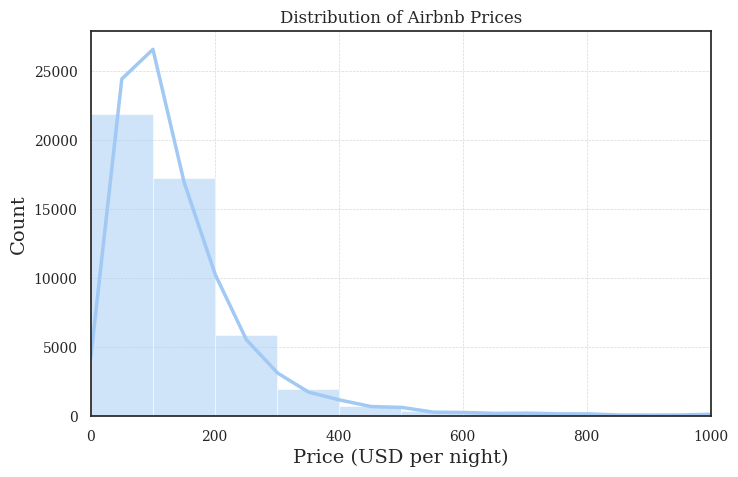

Mean Price: 152.72
Median Price: 106.0
Max Price: 10000


In [21]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=100, kde=True)
plt.title('Distribution of Airbnb Prices')
plt.xlabel('Price (USD per night)')
plt.ylabel('Count')
plt.xlim(0, 1000)  # limit to filter extreme outliers
plt.show()

print("Mean Price:", round(df['price'].mean(), 2))
print("Median Price:", round(df['price'].median(), 2))
print("Max Price:", df['price'].max())